In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

## Question 4 - Evaluating Binary Classifiers

In [3]:
df = pd.read_csv("data/classification_eval_1.csv")

In [4]:
df[df >= 0.5] = 1

In [5]:
df[df < 0.5] = 0

In [6]:
df["gt"].value_counts()

0    798
1    202
Name: gt, dtype: int64

In [7]:
confusion_matrix(df["gt"].values, df["alg_1"].values)

array([[457, 341],
       [ 43, 159]])

In [8]:
accuracy_score(df["gt"].values, df["alg_1"].values), accuracy_score(df["gt"].values, df["alg_2"].values), accuracy_score(df["gt"].values, df["alg_3"].values), accuracy_score(df["gt"].values, df["alg_4"].values)

(0.616, 0.55, 0.321, 0.329)

In [9]:
df = pd.read_csv("data/classification_eval_1.csv")

In [10]:
roc_auc_score(df["gt"].values, df["alg_1"].values), roc_auc_score(df["gt"].values, df["alg_2"].values), roc_auc_score(df["gt"].values, df["alg_3"].values), roc_auc_score(df["gt"].values, df["alg_4"].values)


(0.7320932281198045,
 0.6316285763914737,
 0.06395009801732053,
 0.8473876522990644)

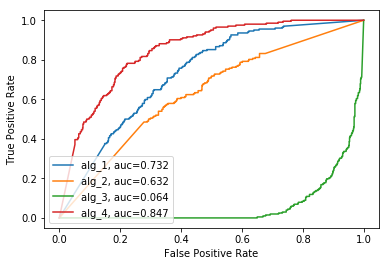

In [11]:
for alg in df.columns[1:]:
    fpr, tpr, _ = roc_curve(df["gt"], df[alg])
    auc = np.round(roc_auc_score(df["gt"], df[alg]), 3)
    plt.plot(fpr,tpr,label=f"{alg}, auc={auc}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=0)
plt.savefig("results/roc-curves.png")
plt.show()

In [12]:
df_new = pd.read_csv("data/classification_eval_1.csv")
df_new.drop(labels=["alg_1", "alg_2", "alg_4"], axis=1, inplace=True)
df_new

,gt,alg_3
0,0,0.821882
1,0,1.000000
2,1,0.000000
3,1,0.000000
4,0,0.296797
5,0,0.493186
6,0,0.261861
7,0,0.687067
8,0,0.502369
9,0,1.000000


In [17]:
df_new['alg_3'] = df['alg_3'].apply(lambda x: 100 - x)

In [18]:
accuracy_score(df_new["gt"].values, df_new["alg_3"].values)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [19]:
roc_auc_score(df_new["gt"].values, df_new["alg_3"].values)

0.9360499019826796

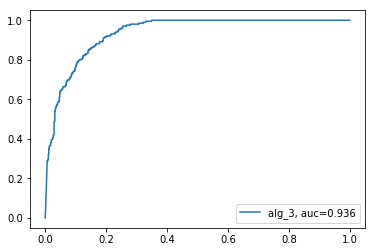

In [20]:
fpr, tpr, _ = roc_curve(df_new["gt"], df_new["alg_3"])
auc = np.round(roc_auc_score(df_new["gt"], df_new.alg_3), 3)
plt.plot(fpr,tpr,label=f"alg_3, auc={auc}")
plt.legend()
plt.show()